---
<h1 align="center"><strong>Add Your Private Data to LLMs Using LangChain & LlamaIndex</strong></h1>
<h4 align="center"><strong>Nour Eddine Zekaoui</strong></h4>
<h4 align="center"><strong>Hiberus</strong></h4>

---

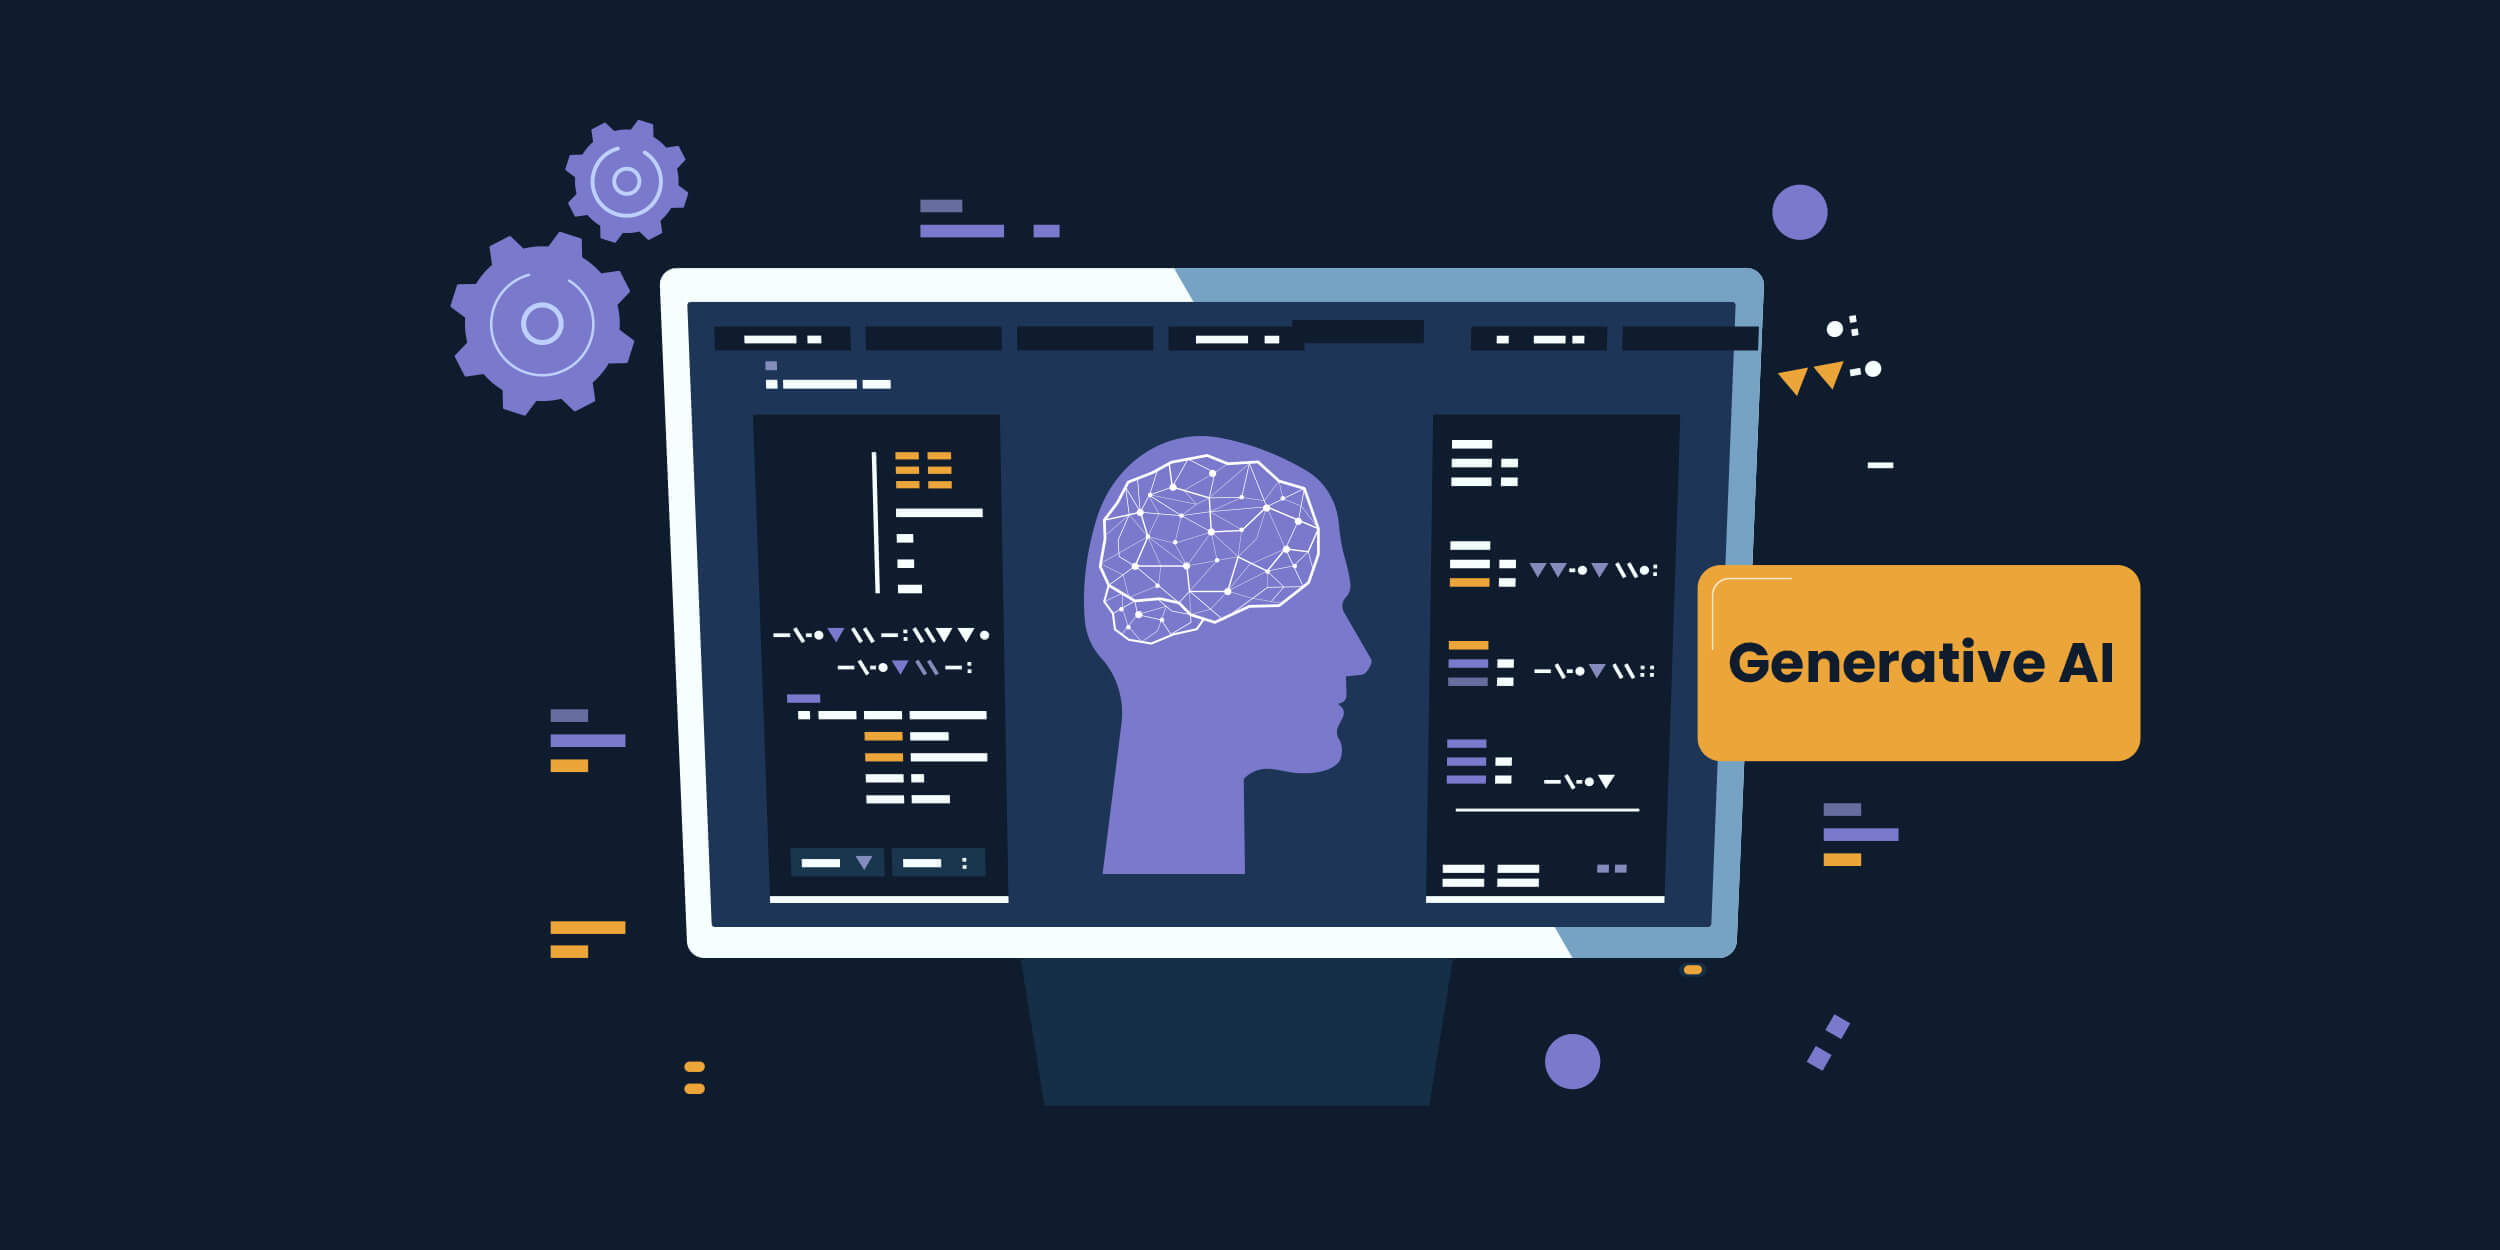

### **Introduction**

Generative AI has stunned the world with its capacity to create realistic images, code, and dialogue. Undoubtedly, **[ChatGPT](https://chat.openai.com/)** has taken the world by storm. Millions are using it. But while it's great for general purpose knowledge, it only knows information it was trained on, which is pre-2021 generally available internet data. It lacks awareness of your private data and remains uninformed about recent data sources.

In the same context, large language models (LLMs) are great at many things, (if you're unfamiliar with LLMs, dont worry, I peaked this amazing [**video**](https://www.youtube.com/watch?v=hfIUstzHs9A) by **Kate Soule** from IBM for you), but they are not especially trained to retrieve factual information. Thus, to improve them in that regard, we can provide them with information that we retrieved from a search step. This makes them more factual and gives a better ability to provide the model with up-to-date information, without the need to retrain these massive models. This is precisely what a retrieval-augmented LLM is. Indeed, this post will precisely outline the creation of such a model and elucidate the optimization steps involved.

The post is about **Adding Private Data to LLMs**, and create a  Retrieval-Augmented Generation (**RAG**) system that laverages ChatGPT knowledge over a specific and factual corpus of data, using prompt engineering tools like **LangChain** and **LlamaIndex**. Indeed, make sure not to miss anything; we have a cool bonus for you at the end.

---

##### **What is LlamaIndex?**
> LlamaIndex simplifies LLM applications. LLMs like **[GPT-4](https://arxiv.org/abs/2303.08774)** and **[LLaMa2](https://arxiv.org/abs/2307.09288)** arrive pretrained on vast public datasets, unlocking impressive natural language processing capabilities. However, they lack your specific private data.

> With LlamaIndex, you can seamlessly incorporate data from **APIs**, **databases**, **PDFs**, and more using adaptable connectors. This data is optimized for LLMs through intermediate representations. This enables effortless natural language queries and interactions using query engines, chat interfaces, and LLM-powered data agents. Your LLM can access and understand extensive private data without requiring model retraining for new information.

> LlamaIndex offers a comprehensive toolkit for language-based applications. Furthermore, leveraging data loaders and agent tools from [Llama Hub](https://llamahub.ai/) allows you to craft intricate applications with diverse functionalities.

##### **What is LangChain?**
> LangChain is a framework for developing applications powered by language models. It enables applications that are:

* **Data-aware:** connect a language model to other sources of data.
* **Agentic**: allow a language model to interact with its environment.

Here are some key advantages of LangChain:
1. **Components**: Abstract tools for working with language models, alongside a collection of implementations for each tool. These modular components are user-friendly and can be employed independently of the LangChain framework.
2. **Off-the-shelf chains**: a structured assembly of components for accomplishing specific higher-level tasks

> The availability of pre-designed chains facilitates easy initiation. For intricate applications and nuanced scenarios, components allow effortless customization of existing chains or the creation of new ones.

In this tutorial, we will utilize LangChain solely to initialize our LLM and embedder models sourced from Azure OpenAI.

### **How it Works?**

RAG is all about integrating the power of searching into a base LLM. In general, it consists of a retriever, which retrieves relevant document snippets from a large corpus of external information, and an LLM, which produces answers from these snippets as illustrated in the diagram below:

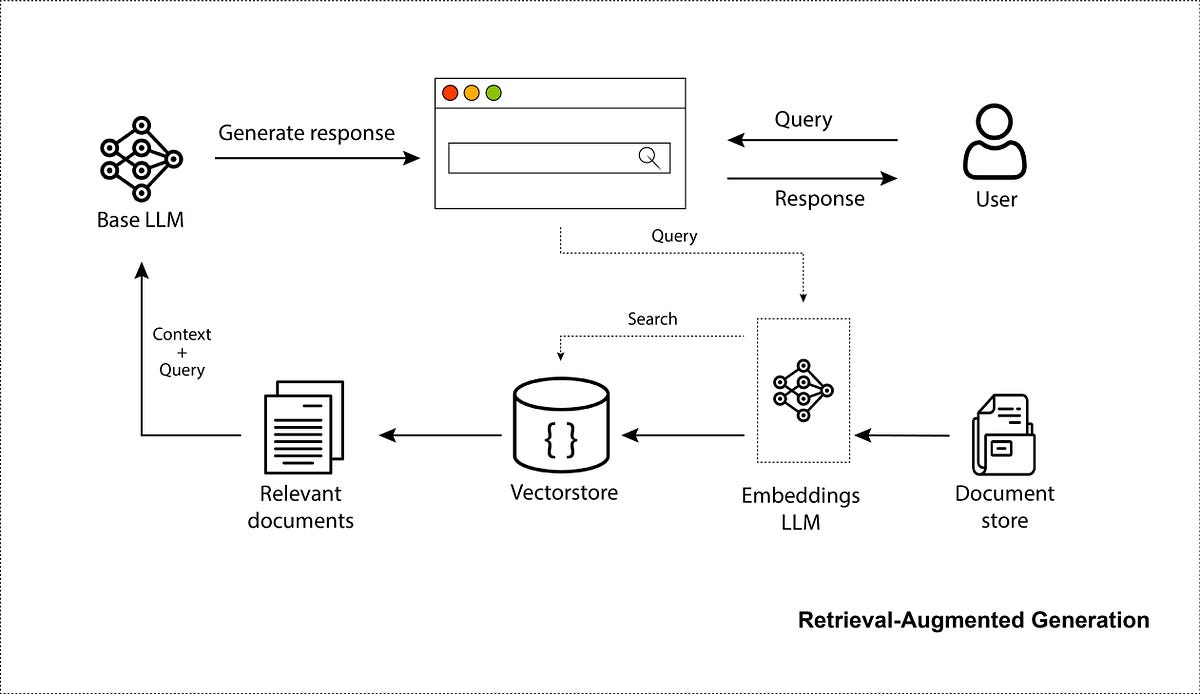

### **Install Required Libs**

Before driving, we must put on seat belts; similarly here, before doing anything, make sure you have installed the **OpenAI** package and also **LlamaIndex**, **LangChain**, and **PyPDF**. You need to install **`PyPDF`** to enable **`LlamaIndex`**'s built-in functions to **read** and **convert** **`PDF`** files.

In [ ]:
!pip install pypdf -q
!pip install gradio -q
!pip install langchain -q
!pip install llama_index -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.2 MB/s eta 0

### **Imports**

In the code snippet below, we import the `openai` package along with the built-in **classes** and **functions** of `LlamaIndex` and `LangChain` packages. Additionally, we import the `os` package to define some environment variables that we will set later.

In [ ]:
import os
import gradio as gr

from langchain.embeddings import OpenAIEmbeddings
from langchain.chat_models import AzureChatOpenAI

from llama_index import (
    SimpleDirectoryReader,
    LLMPredictor,
    PromptHelper,
    StorageContext,
    ServiceContext,
    GPTVectorStoreIndex,
    LangchainEmbedding,
    load_index_from_storage,
    set_global_service_context)

from llama_index.node_parser import SimpleNodeParser
from llama_index.text_splitter import TokenTextSplitter
from llama_index.response.notebook_utils import display_response

We will use Azure OpenAI Studio for which we need to access the OpenAI API. Let's begin by setting up environment variables to configure access to the OpenAI API hosted on Azure. This involves including the **API key**, **version**, **type**, and **base URL** that are essential for the Python script to effectively communicate with the API.

It's worth noting that the OpenAI API from the website can be integrated similarly, requiring the setup of a single environment variable, **`OPENAI_API_KEY`**.

In [ ]:
os.environ['OPENAI_API_KEY'] = 'your-openai-api-key'
os.environ['OPENAI_API_TYPE'] = 'your-openai-api-type'
os.environ['OPENAI_API_VERSION'] = 'your-openai-api-version'
os.environ['OPENAI_API_BASE'] = 'your-openai-api-base'

### **Service Context**

In the following function, after setting several  **constraint parameters**, including `max_input_size` and `num_outputs`. To effectively deal with LLM **context window token limitations** we define a prompt helper, **`PromptHelper`**. This helper calculates available context size by starting with the LLM's context window size and reserve token space for the prompt template, and the output.

The prompt helper provides utility for `repacking` text chunks (retrieved from index) to maximally make use of the available context window (and thereby reducing the number of LLM calls needed), or truncating them so that they fit in a single LLM call. Indeed, feel free to adjust the configuration choices to align with your requirements.

Additioanly, we use the **`AzureChatOpenAI`** class to create our chat model based on **GPT-3.5 Turbo**. Notably, the **chatgpt_model** serves as the deployment name for GPT-3.5 Turbo within Azure OpenAI Studio. Furthermore, we use the **`OpenAIEmbeddings`** class to construct our embedder, leveraging the potent OpenAI **text-embedding-ada-002** embedding model.

Finally, we construct **`ServiceContext`**, which bundles commonly used ressources during the indexing and querying stages of a LlamaIndex pipeline. We employ it to configure both the **global** and **local** configurations.

In [ ]:
def create_service_context(
        # Constraint parameters
        max_input_size=4096,        # Context window for the LLM.
        num_outputs=256,            # Number of output tokens for the LLM.
        chunk_overlap_ratio=0.1,    # Chunk overlap as a ratio of chunk size.
        chunk_size_limit=None,      # Maximum chunk size to use.
        chunk_overlap=20,           # Maximum chunk size to use.
        chunk_size=1024):           # Set chunk overlap to use.
    
    # The parser that converts documents into nodes.
    node_parser = SimpleNodeParser.from_defaults(
        # The text splitter used to split text into chunks.
        text_splitter=TokenTextSplitter(
            chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    )

    # Allows the user to explicitly set certain constraint parameters.
    prompt_helper = PromptHelper(
        max_input_size,
        num_outputs,
        chunk_overlap_ratio,
        chunk_size_limit=chunk_size_limit)

    # LLMPredictor is a wrapper class around LangChain's LLMChain that allows easy integration into LlamaIndex.
    llm_predictor = LLMPredictor(
        llm=AzureChatOpenAI(
            # temperature=0.5,
            deployment_name="chatgpt_model",
            max_tokens=num_outputs))

    # The embedding model used to generate vector representations of text.
    embedding_llm = LangchainEmbedding(
        langchain_embeddings=OpenAIEmbeddings(
            model="text-embedding-ada-002",
            chunk_size=1)
    )

    # Constructs service_context
    service_context = ServiceContext.from_defaults(
        llm_predictor=llm_predictor,
        embed_model=embedding_llm,
        node_parser=node_parser,
        prompt_helper=prompt_helper)

    return service_context


### **Data Loading**

I am enthusiastic about connecting research and production. Therefore, we will be using the [**Chinchilla**](https://arxiv.org/abs/2203.15556) paper by Jordan Hoffmann et al. from DeepMind as our private data and ask some cool questions about its main findings. When discussing the Chinchilla paper, the **Chinchilla-70B** parameters model trained as a compute-optimal model with **1.4 trillion tokens**, comes to mind. The paper's findings suggest that these types of models are trained optimally by **equally scaling both model size and training tokens**. It uses the same compute budget as Gopher but with **4x more training data**.

In [ ]:
!mkdir data

### **Data Ingestion**

In the **data ingestion** stage, we start by creating a directory named **`data`** containing only one **PDF** file, the Chinchilla paper PDF file, then we use the **`SimpleDirectoryReader`** to read it and then convert it into an index using the **`GPTVectorStoreIndex`**.

Indeed, for indexing our embedded documents, we use LlamaIndex **`GPTVectorStoreIndex`**, which creates **numerical vectors** from the text using **word embeddings** and retrieves relevant documents based on the **similarity** of the vectors. When we index the documents.

**Index re-creation** is a **time-consuming** process, but it can be avoided by saving the context. The following command saves the index in the a default directory **`./storage`**.

In [ ]:
def data_ingestion_indexing(directory_path):
  # Loads data from the specified directory path
  documents = SimpleDirectoryReader(directory_path).load_data()

  # When first building the index
  index = GPTVectorStoreIndex.from_documents(
      documents, service_context=create_service_context()
  )

  # Persist index to disk, default "storage" folder
  index.storage_context.persist()

  return index

### **Running a query**

**`Setting global configuration`**: We can set a **service context** as the **global default** that applies to the entire LlamaIndex pipeline.

In [ ]:
service_context = create_service_context()
set_global_service_context(service_context)

Our approach involves asking a general question about the paper and obtaining a response usingv**`query_engine.query`**. Moreover, we ask a series of related follow-up questions using the **`query_engine.chat`** without providing extra context. We will elaborate on these two options in the upcoming sections. Let's now initilize our **index**. Please make sure you have moved the chinchilla paper to the **`data`** folder before running the following snippet:

In [ ]:
index = data_ingestion_indexing("data")

#### **1. Q&A**

Once our private data has been indexed, we can begin asking questions by using **`as_query_engine()`**. This function enables you to ask questions about specific information within the document and receive a corresponding response with the help of OpenAI **GPT-3.5 Turbo** model.

In [ ]:
query_engine = index.as_query_engine()

In [ ]:
response = query_engine.query("Hello, who are you?")
display_response(response)

**`Final Response:`** I am an expert Q&A system that is trusted around the world.

In [ ]:
response = query_engine.query("What is the Chinchilla model?")
display_response(response)

**`Final Response:`** The Chinchilla model is an autoregressive transformer language model developed by DeepMind for research on language models, including research on the scaling behavior of language models. It has been tested on various tasks such as closed-book question answering and coreference resolution, and has shown to outperform other models in some cases.

> Awesome! As we can see, the LLM model has accurately responded to the query. It searched the index and found the relevant information, then write it in human-like manner. One additional point to note is that we used `display_response()` to display the response in a well-structured HTML format.

One more unfortunate aspect of ChatGPT is that when we posed the same questions to it, it appeared to be unaware of current world events. You can find its funny response below:

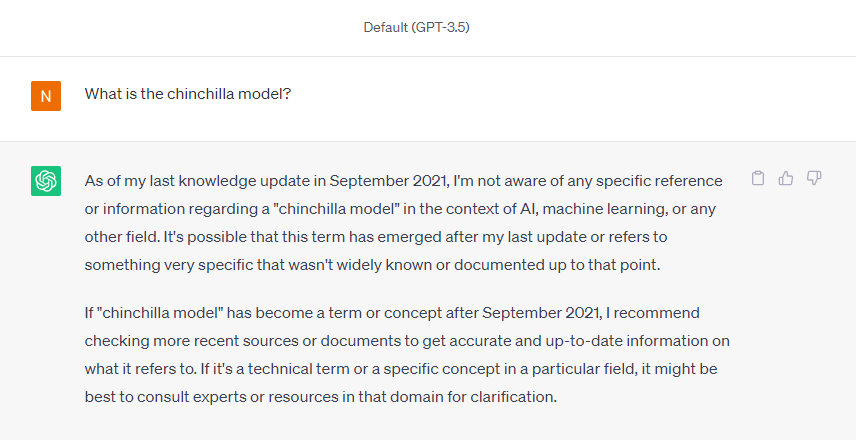

In [ ]:
response = query_engine.query("How many parameters does it have?")
display_response(response)

**`Final Response:`** The context information provides information on the number of parameters for various models, ranging from under 70M to over 16B parameters. However, without specific mention of a particular model, it is not possible to provide an exact answer to the query.

The model does know to which word **it** refers, but this will occur frequently in the context of **follow-up questions**. We will address this issue in the next section!

#### **2. Chatbot**

Instead of Q&A, we can also use LlamaIndex to create a personal **Chatbot** that supports **`follow up`** question without giving additional context. We just have to initialize the index with the **as_chat_engine()** function.

In [ ]:
chat_engine = index.as_chat_engine()

In [ ]:
response = chat_engine.chat("What is the chinchilla model?")
display_response(response)

**`Final Response:`** The Chinchilla model is an autoregressive transformer language model developed by DeepMind for research on language models, including research on the scaling behavior of language models. It has been evaluated on various tasks such as closed-book question answering, coreference resolution, and MMLU (Meaningful Metric for Language Understanding) and has outperformed other models such as Gopher and GPT-3 in some cases. The model has been analyzed for potential issues such as gender bias and generation of toxic language.

In [ ]:
response = chat_engine.chat("How many parameters does it have?")
display_response(response)

**`Final Response:`** The Chinchilla model has 70 billion parameters.

### **Bonus**

As a fan of [Hugging Face](https://huggingface.co/) and its ecosystem, I can't conclude this blog without somehow discussing it. Indeed, our bonus is all about creating an interface using Hugging Face's [Gradio](https://www.gradio.app/). To achieve this, we implement a function that rebuilds the storage context, loads the index, and queries it with an input text.

In [ ]:
def data_querying(input_text, follow_up_questions = False):
  # Rebuild storage context
  storage_context = StorageContext.from_defaults(persist_dir="./storage")

  # Loads index from storage
  index = load_index_from_storage(storage_context, service_context=create_service_context())

  # Check if it's a follow up chat ot not
  # Queries the index with the input text
  if follow_up_questions:
    response = index.as_chat_engine().chat(input_text)
  else:
    response = index.as_query_engine().query(input_text)
  return response.response

In [ ]:
iface = gr.Interface(
    fn=data_querying,
    inputs=gr.components.Textbox(lines=3, label="Enter your question"),
    outputs="text",
    title="Ask Me Anything About Chinchila Paper")

iface.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
iface = gr.ChatInterface(data_querying)
iface.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### **Conclusion**

In this tutorial we saw, `LangChain` and `LlamaIndex` provides a powerful toolkit fop building retrieval-augmnted LLM based applications that combines the streghts of large language models with custom knowledge bases. It enables creating an indexed store of domain-specific data and laveraging it during inference to provide relevant context to the LLM to generate high-quality responses in human like language.

---
<h1 align="center"><strong>BEHIND THE AI</strong></h1>


---

At [**Hiberus Tecnología**](https://www.hiberus.com/) we believe that AI is going to become an essential tool in all fields and sectors in the near future. That is why we have created the [**Behind the AI**](https://www.hiberus.com/behind-ai-ld) newsletter in which we tell you all the news and relevant facts that you should know so as not to miss anything about Artificial Intelligence.

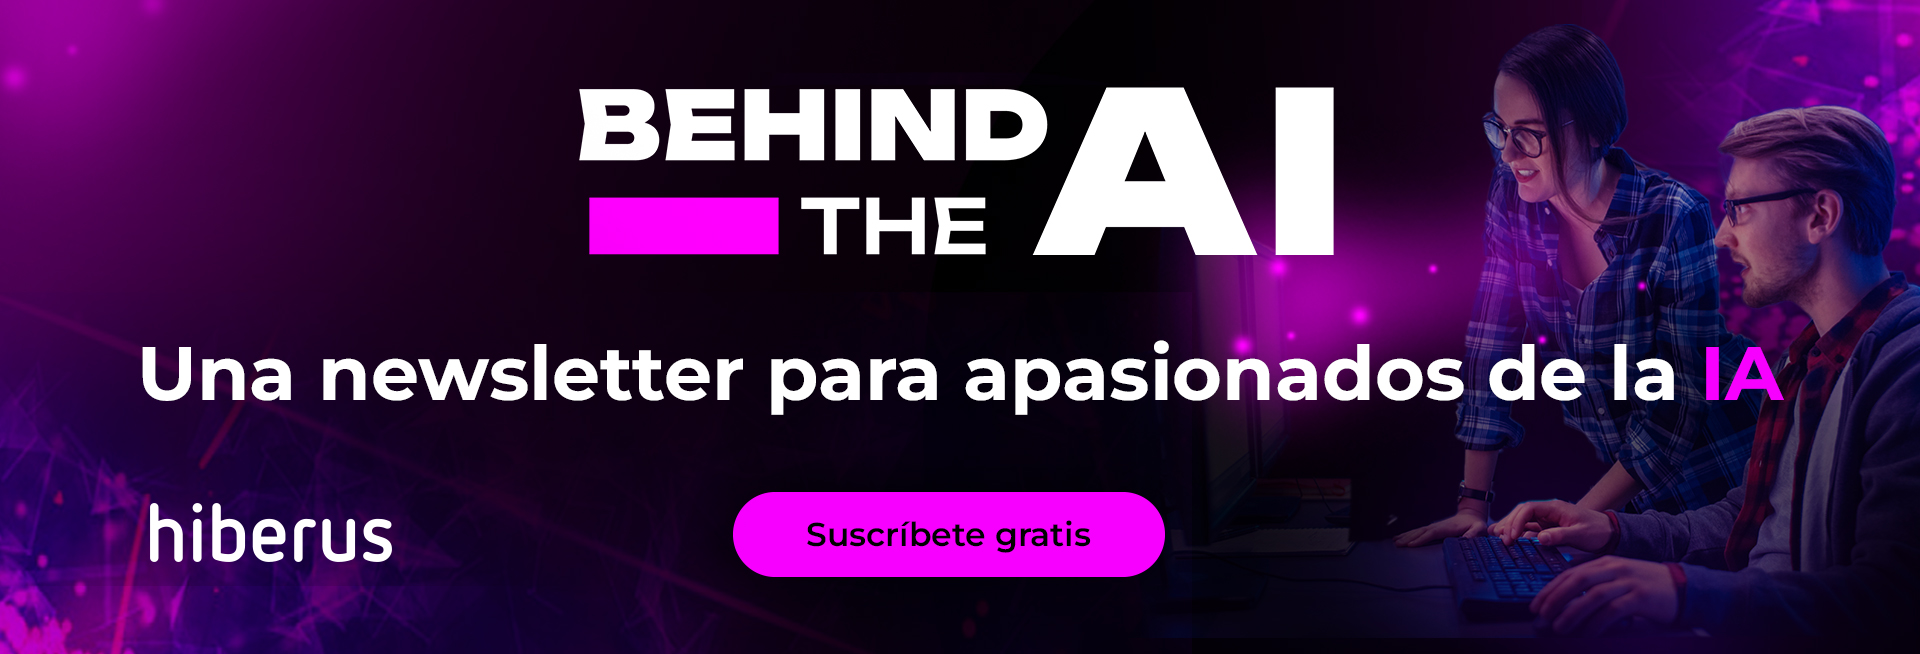

---